# Distribution Investigation

## Data Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, shapiro, anderson, normaltest, chi2_contingency
import split_test_and_train as splt

# Load your X_testset
X_test,y_test, X_train, X_val, y_train, y_val = splt.split_data_into_test_train_validation()

# Number of columns to visualize
numeric_columns = X_train.select_dtypes(include=[np.number]).columns
num_cols = len(numeric_columns)

# Set up grid size
grid_cols = 4  # Adjust to control the number of columns in the grid
grid_rows = (num_cols + grid_cols - 1) // grid_cols  # Calculate rows needed

# Create the grid for histograms
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(16, grid_rows * 4))
axes = axes.flatten()  # Flatten to easily iterate over

for i, column in enumerate(numeric_columns):
    sns.histplot(X_train[column], kde=True, ax=axes[i])
    axes[i].set_title(f"Histogram of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

# Hide any unused subplots if the grid is larger than the number of columns
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()



TypeError: split_data_into_test_train_validation() missing 2 required positional arguments: 'data' and 'target_column'

In [ ]:
import pandas as pd
from scipy.stats import kstest, shapiro, norm

# Create empty lists to store results
shapiro_results = []
ks_results = []
fitted_params = []

# Iterate over numeric columns
for column in numeric_columns:
    # Shapiro-Wilk Test
    stat_shapiro, p_shapiro = shapiro(X_train[column].dropna())
    shapiro_results.append({
        "Column": column,
        "Shapiro-Wilk W-stat": stat_shapiro,
        "Shapiro-Wilk p-value": p_shapiro,
        "Normal (p > 0.05)": p_shapiro > 0.05
    })
    
    # Kolmogorov-Smirnov Test
    stat_ks, p_ks = kstest(X_train[column].dropna(), 'norm', args=(X_train[column].mean(), X_train[column].std()))
    ks_results.append({
        "Column": column,
        "KS-stat": stat_ks,
        "KS p-value": p_ks,
        "Normal (p > 0.05)": p_ks > 0.05
    })
    
# Convert to DataFrames
shapiro_df = pd.DataFrame(shapiro_results)
ks_df = pd.DataFrame(ks_results)


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


## Kolmogorov-Smirnov Test: 
- Compares the data to a reference distribution (e.g., normal, uniform).

In [ ]:
print("\nKolmogorov-Smirnov Test Results:")
ks_df[ks_df['Normal (p > 0.05)'] == True]
#No Kolmorogov distribution in my df


Kolmogorov-Smirnov Test Results:


,Column,KS-stat,KS p-value,Normal (p > 0.05)


## Shapiro-Wilk Test: 
- Tests if data follows a normal distribution.

In [ ]:
# Display results
print("Shapiro-Wilk Test Results:")
shapiro_df[shapiro_df['Normal (p > 0.05)'] == True]

Shapiro-Wilk Test Results:


,Column,Shapiro-Wilk W-stat,Shapiro-Wilk p-value,Normal (p > 0.05)
16,Hydroelectric_capacity_NE(MWavg),1.0,1.0,True
25,Wind_capacity_N(MWavg),1.0,1.0,True
27,Nuclear_capacity_SE/CW(MWavg),1.0,1.0,True


These columns follow normal distribution, because the values are the same across the dataframe. 

This is due to the fact that no new wind, hydro and nuclear capacity has been installed within the years of 2021-2024

## Weibull Distribution 
- no weibull distribution found

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import weibull_min, kstest

# Load your dataset
# Assuming `df` contains your data

# Select numeric columns
numeric_columns = X_test.select_dtypes(include=[np.number]).columns

# Initialize results list
weibull_results = []

# Plot histograms and fit Weibull
for column in numeric_columns:
    data = X_test[column].dropna()

    # Fit Weibull distribution
    params = weibull_min.fit(data)
    shape, loc, scale = params

    # Perform Kolmogorov-Smirnov test
    stat_ks, p_ks = kstest(data, 'weibull_min', args=params)

    # Save results
    weibull_results.append({
        "Column": column,
        "Shape (c)": shape,
        "Location (loc)": loc,
        "Scale (scale)": scale,
        "KS-stat": stat_ks,
        "KS p-value": p_ks,
        "Weibull Fit (p > 0.05)": p_ks > 0.05
    })


# Convert results to a DataFrame
weibull_df = pd.DataFrame(weibull_results)

# Display results
print("Weibull Fit Results:")
weibull_df[weibull_df['Weibull Fit (p > 0.05)'] == True]




C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_continuous_distns.py:2321: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  s = stats.skew(data)


Weibull Fit Results:


,Column,Shape (c),Location (loc),Scale (scale),KS-stat,KS p-value,Weibull Fit (p > 0.05)


Show capacity columns for distribution 
- VERONIKA's WIP

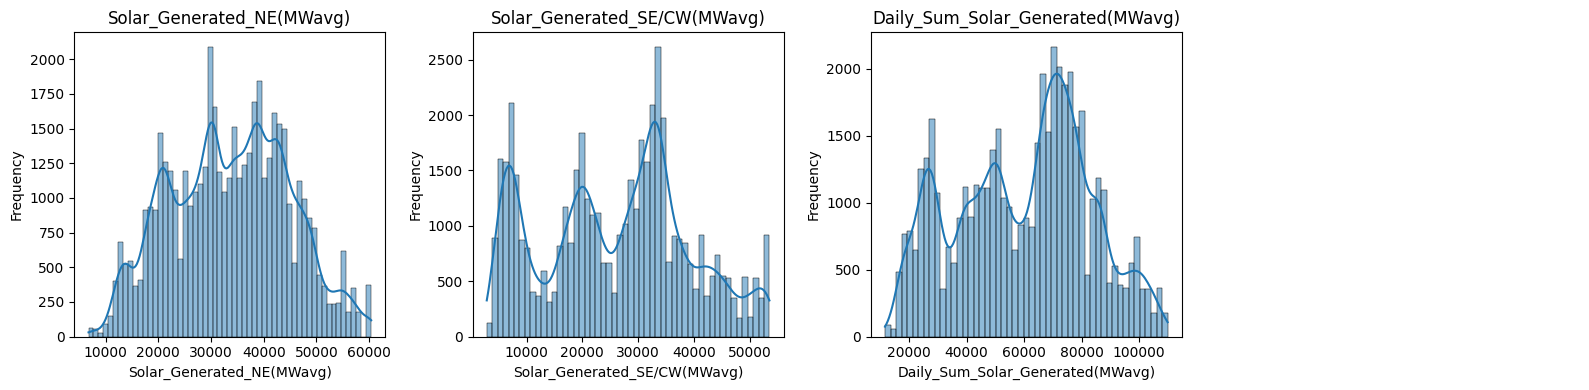

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, shapiro, anderson, normaltest, chi2_contingency
import split_test_and_train as splt

# Load your X_testset
X_test,y_test, X_train, X_val, y_train, y_val = splt.split_data_into_test_train_validation()
X_train = X_train.filter(like='Solar_Generated', axis=1)

# Number of columns to visualize
numeric_columns = X_train.select_dtypes(include=[np.number]).columns
num_cols = len(numeric_columns)

# Set up grid size
grid_cols = 4  # Adjust to control the number of columns in the grid
grid_rows = (num_cols + grid_cols - 1) // grid_cols  # Calculate rows needed

# Create the grid for histograms
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(16, grid_rows * 4))
axes = axes.flatten()  # Flatten to easily iterate over

for i, column in enumerate(numeric_columns):
    sns.histplot(X_train[column], kde=True, ax=axes[i])
    axes[i].set_title(f"{column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

# Hide any unused subplots if the grid is larger than the number of columns
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


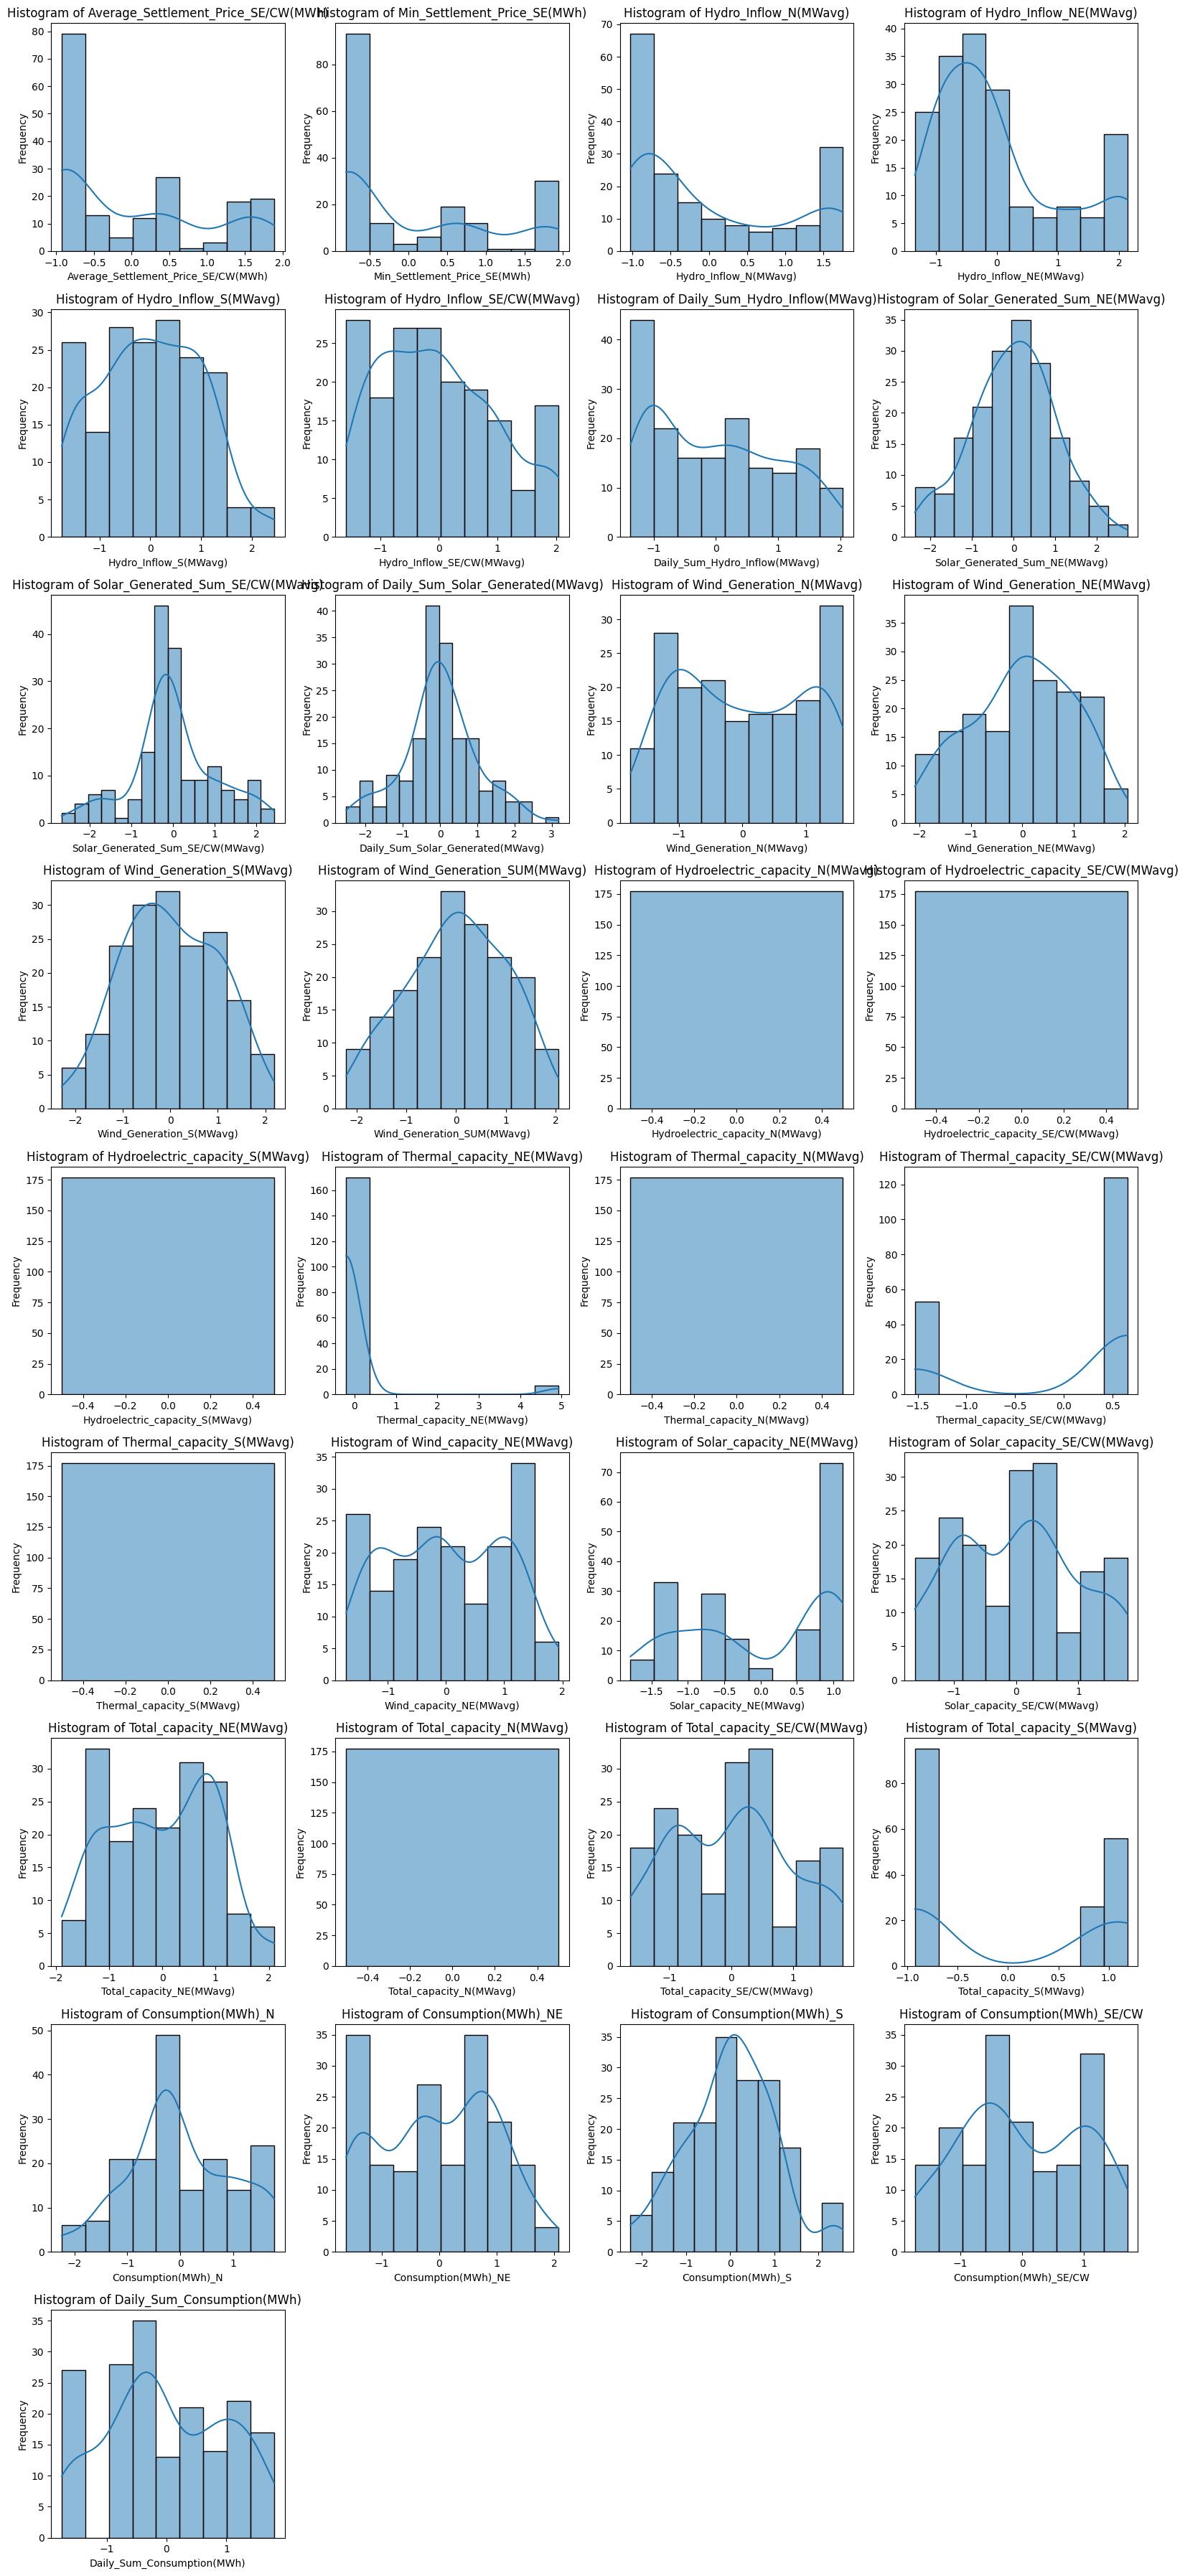

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, shapiro, anderson, normaltest, chi2_contingency
import split_test_and_train as splt
from build_a_pipeline import build_pipeline_P0_foward_price

# Load your X_testset
X_test,y_test, X_train, X_val, y_train, y_val = build_pipeline_P0_foward_price(deal_with_skewness=True)
# Number of columns to visualize
numeric_columns = X_train.select_dtypes(include=[np.number]).columns
num_cols = len(numeric_columns)

# Set up grid size
grid_cols = 4  # Adjust to control the number of columns in the grid
grid_rows = (num_cols + grid_cols - 1) // grid_cols  # Calculate rows needed

# Create the grid for histograms
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(16, grid_rows * 4))
axes = axes.flatten()  # Flatten to easily iterate over

for i, column in enumerate(numeric_columns):
    sns.histplot(X_train[column], kde=True, ax=axes[i])
    axes[i].set_title(f"Histogram of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

# Hide any unused subplots if the grid is larger than the number of columns
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()



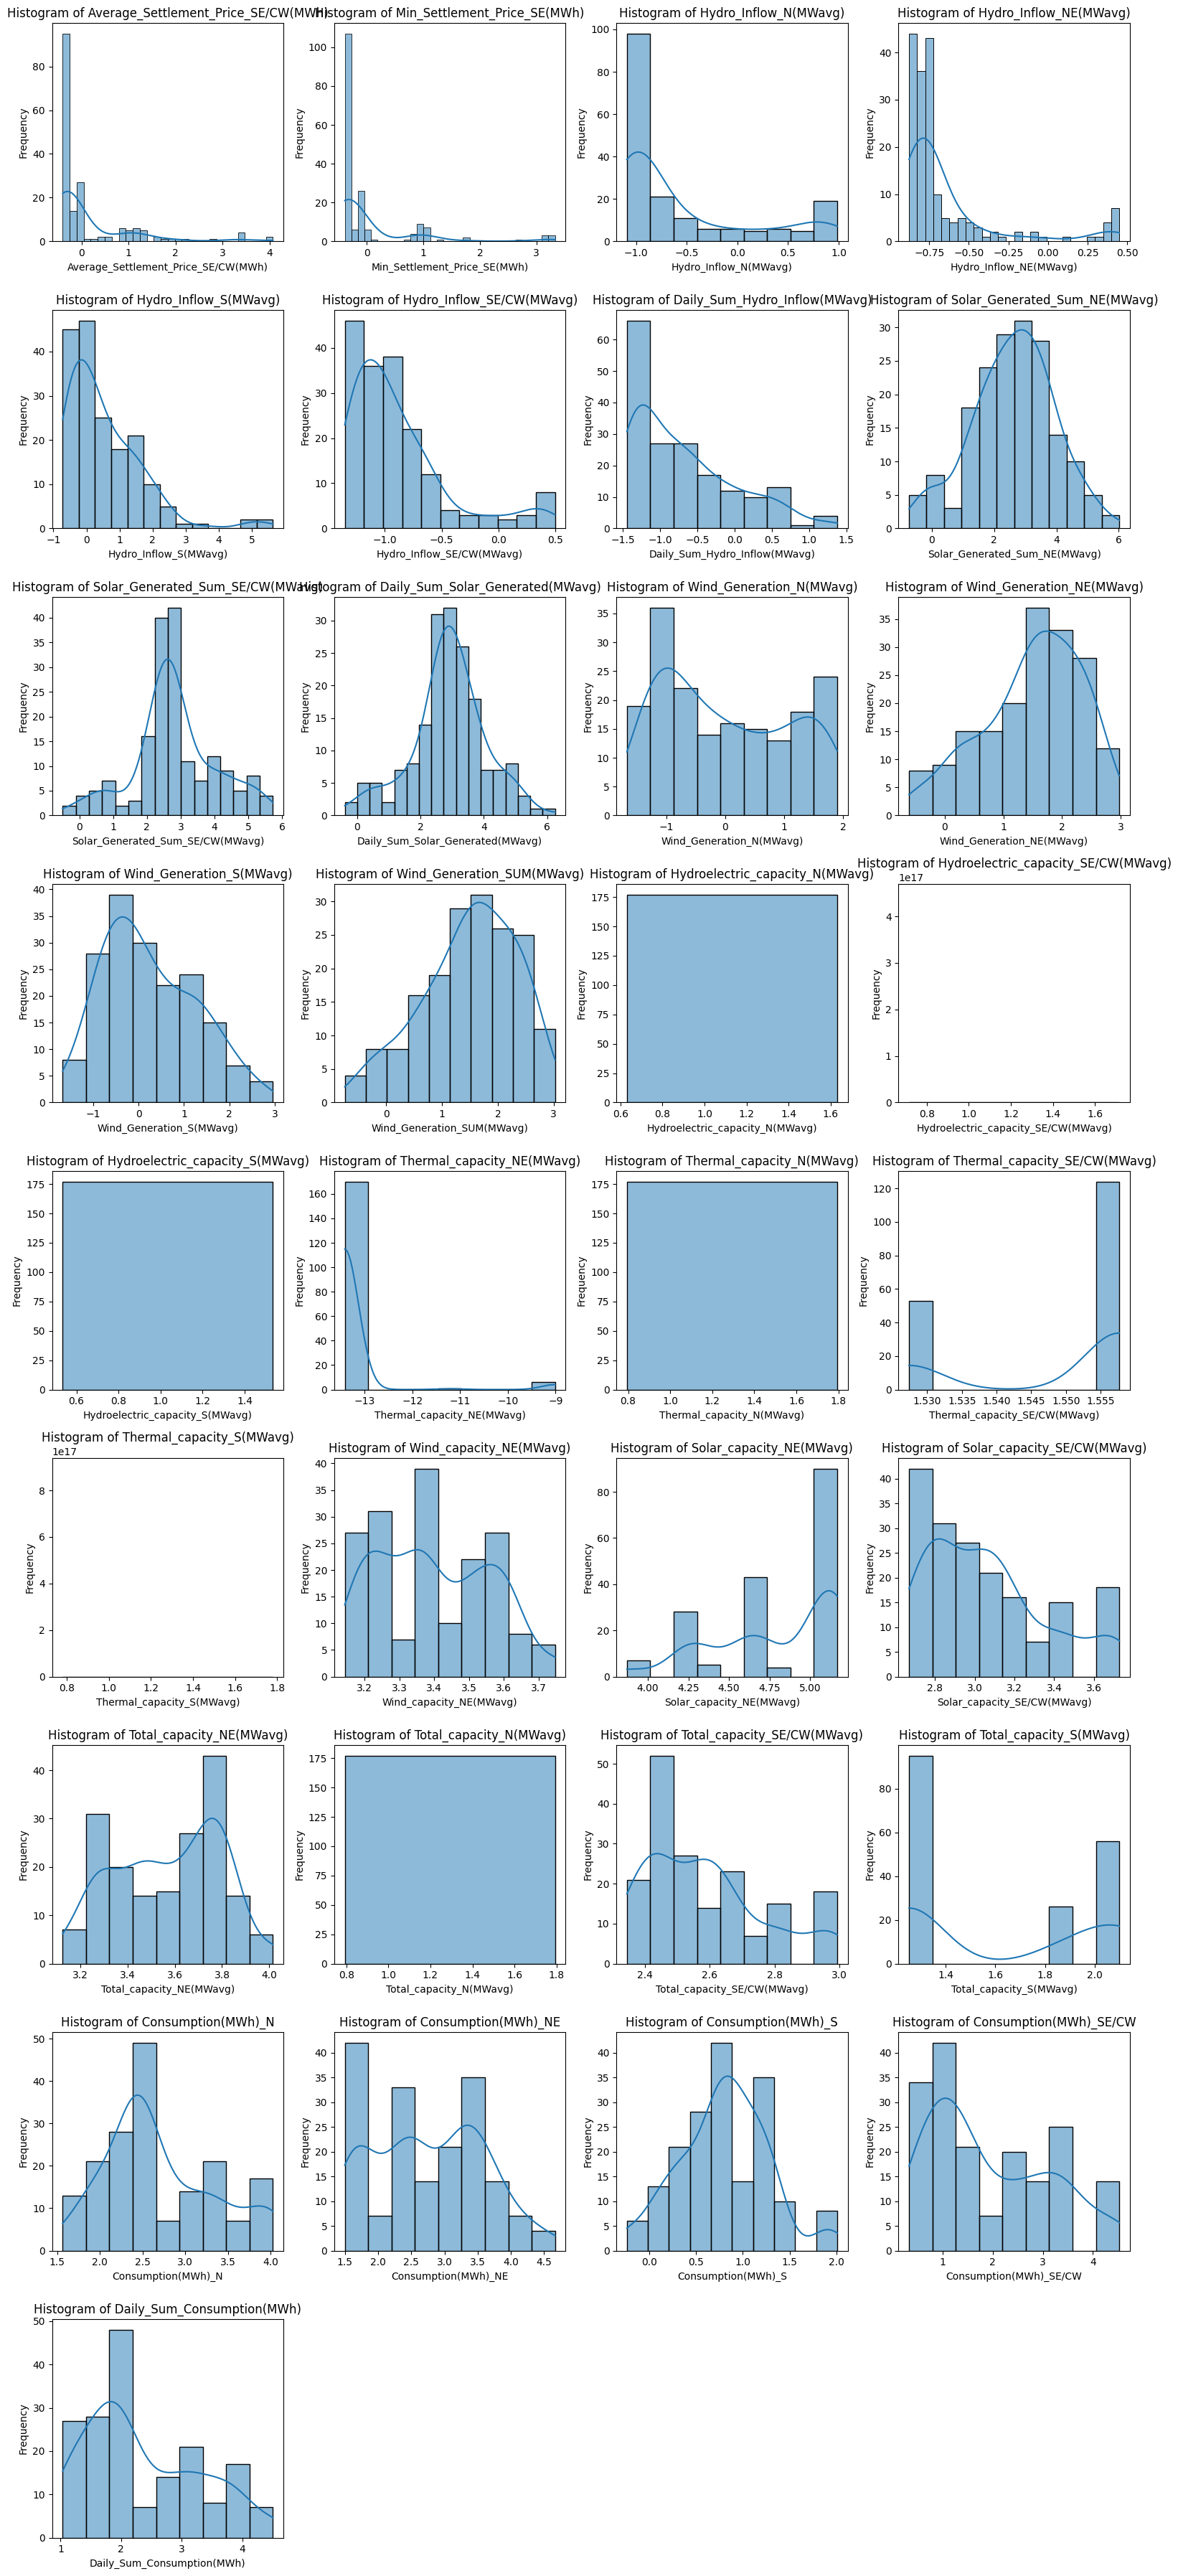

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, shapiro, anderson, normaltest, chi2_contingency
import split_test_and_train as splt
from build_a_pipeline import build_pipeline_P0_foward_price

# Load your X_testset
X_test,y_test, X_train, X_val, y_train, y_val = build_pipeline_P0_foward_price(deal_with_skewness=False)
# Number of columns to visualize
numeric_columns = X_train.select_dtypes(include=[np.number]).columns
num_cols = len(numeric_columns)

# Set up grid size
grid_cols = 4  # Adjust to control the number of columns in the grid
grid_rows = (num_cols + grid_cols - 1) // grid_cols  # Calculate rows needed

# Create the grid for histograms
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(16, grid_rows * 4))
axes = axes.flatten()  # Flatten to easily iterate over

for i, column in enumerate(numeric_columns):
    sns.histplot(X_train[column], kde=True, ax=axes[i])
    axes[i].set_title(f"Histogram of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

# Hide any unused subplots if the grid is larger than the number of columns
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

